In [1]:
import pandas as pd
import numpy as np
import numpy as np
import seaborn as sns
import scikitplot as skplt
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from  sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
#models
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from IPython.display import display
pd.options.display.max_columns = None
display()
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

Using TensorFlow backend.


In [3]:
import pandas as pd
url = 'https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(url, error_bad_lines=False)
df['Churn']=df['Churn'].replace('No',0)
df['Churn']=df['Churn'].replace('Yes',1)
df['Churn']=df['Churn'].astype(int)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [4]:
#df.replace(r'^\s*$', np.nan, regex=True).isna().sum()

In [5]:
df = df.replace(r'^\s*$', np.nan, regex=True)
df.iloc[:, 19] = pd.to_numeric(df.iloc[:, 19], errors='coerce')
from sklearn.impute import SimpleImputer
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
df.iloc[:, 19] = imp_median.fit_transform(df.iloc[:, 19].values.reshape(-1, 1) )
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [6]:
cleaned_df=df.drop(['customerID'],axis=1)

In [7]:
#output
y=cleaned_df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

In [8]:
x=pd.get_dummies(cleaned_df.drop(['Churn'],axis=1))
x

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1


In [9]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0)

#normalizing the data
sc=StandardScaler()
X_train=sc.fit_transform(x_train)
X_test=sc.transform(x_test)
#from imblearn.combine import SMOTEENN
# upsampling fro imbalanced dataset.
x_train_res,y_train_res=SMOTE().fit_sample(X_train, y_train)
n_cols=x_train_res.shape[1]
print("No of input features= ",n_cols)

No of input features=  45


In [10]:
#XGBoost hyper-parameter tuning
def hyperParameterTuning(x_train_res, y_train_res):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200],
        'objective': ['binary:logistic']
    }

    xgb_model = XGBClassifier()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [85]:
hyperParameterTuning(x_train_res, y_train_res)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed: 11.7min finished


{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 5,
 'n_estimators': 100,
 'objective': 'binary:logistic',
 'subsample': 0.7}

In [11]:
xgb_clf = XGBClassifier(
        objective='binary:logistic',
        colsample_bytree = 0.7,
        learning_rate = 0.1,
        max_depth = 3,
        min_child_weight = 5,
        subsample = 0.7,
        n_estimators=100)

In [12]:
# xgb 
#xgb_clf = XGBClassifier()

xgb_clf.fit(x_train_res, y_train_res)
y_pred_ts = xgb_clf.predict(X_test)
#y_score = xgb_clf.predict_proba(X_test)[:,1]

print(confusion_matrix(y_test,y_pred_ts),'confusion_matrix')
print('testing_accuracy XGB =',(metrics.accuracy_score (y_test, y_pred_ts ))*100)
y_pred_training =  xgb_clf.predict(X_train)
print(confusion_matrix(y_train,y_pred_training),'confusion_matrix')
print('training_accuracy XGB=',(metrics.accuracy_score (y_train,y_pred_training))*100)
print(accuracy_score(y_test,y_pred_ts))
#print(classification_report(y_test,y_pred_ts))
#model_performance_plot('xgb_clf')

[[853 188]
 [120 248]] confusion_matrix
testing_accuracy XGB = 78.14052519517388
[[3425  708]
 [ 404 1097]] confusion_matrix
training_accuracy XGB= 80.2626908058218
0.7814052519517388


In [ ]:
###########################################with grid search
testing_accuracy XGB = 78.14052519517388
[[854 187]
 [121 247]] confusion_matrix
training_accuracy XGB= 80.08519701810437
[[3428  705]
 [ 417 1084]] confusion_matrix

accuracy: 0.7814052519517388

########################################without grid search
testing_accuracy XGB = 77.43080198722498
[[881 160]
 [158 210]] confusion_matrix

training_accuracy XGB= 91.92403265885693
[[3875  258]
 [ 197 1304]] confusion_matrix

Accuracy:0.7743080198722498

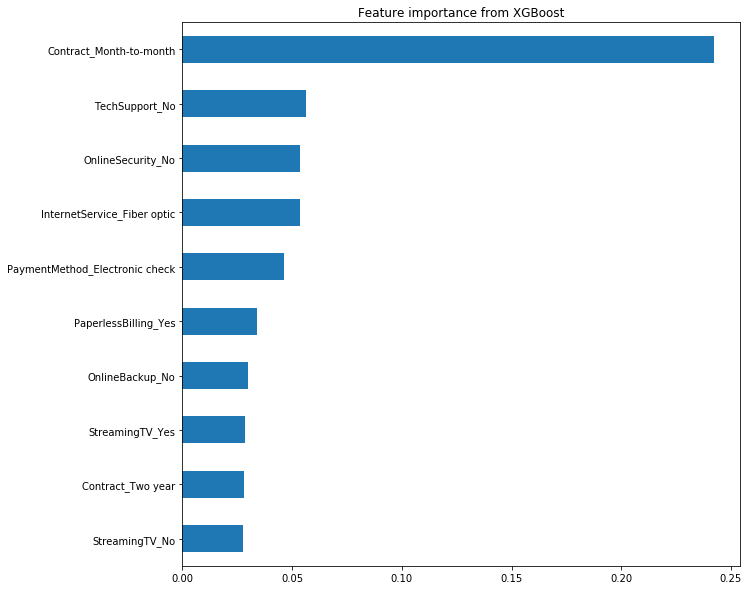

In [13]:
#Feature selection

pd.Series(xgb_clf.feature_importances_, index = x.columns).nlargest(10).plot(kind = 'barh',
                                                                               figsize = (10, 10),
                                                                              title = 'Feature importance from XGBoost').invert_yaxis();

C:\Users\Vimal\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


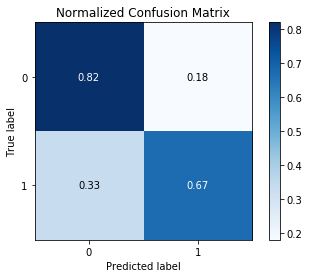

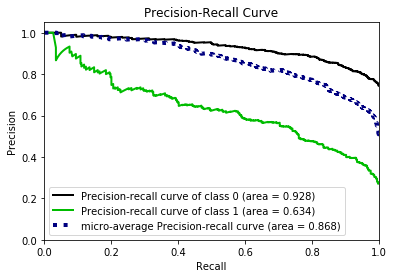

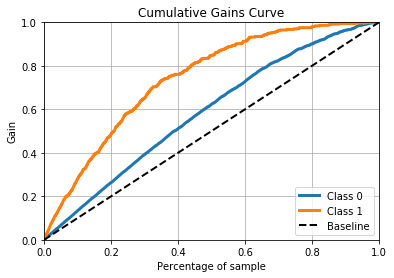

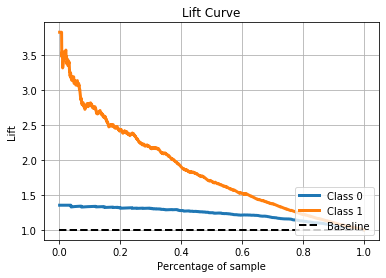

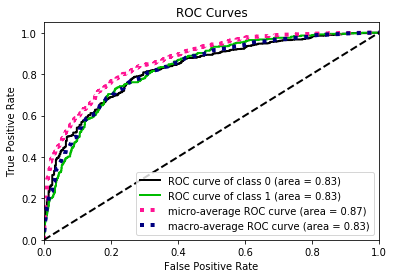

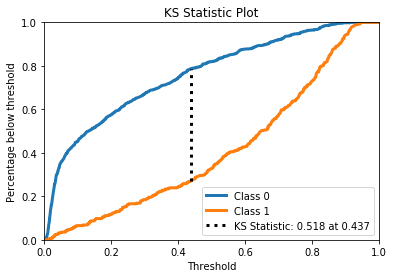

In [14]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred_ts, normalize=True)


y_pred_test  =xgb_clf.predict_proba(X_test)
skplt.metrics.plot_precision_recall_curve(y_test, y_pred_test)

skplt.metrics.plot_cumulative_gain(y_test,y_pred_test)
skplt.metrics.plot_lift_curve(y_test,y_pred_test)
skplt.metrics.plot_roc (y_test,y_pred_test)
y_pred_test  = xgb_clf.predict_proba(X_test)
skplt.metrics.plot_ks_statistic(y_test,y_pred_test)